In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [40]:
df=pd.read_csv('/kaggle/input/salary-csv/Salary_dataset.csv')
df.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [41]:
df=df.drop('Unnamed: 0',axis=1)

In [42]:
df

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0
5,3.0,56643.0
6,3.1,60151.0
7,3.3,54446.0
8,3.3,64446.0
9,3.8,57190.0


Text(0, 0.5, 'Salary')

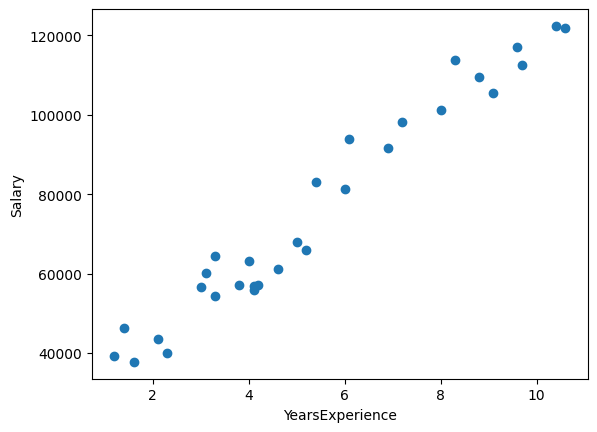

In [43]:
plt.scatter(df[['YearsExperience']],df[['Salary']])
plt.xlabel('YearsExperience')
plt.ylabel('Salary')

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [45]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.413333,76004.000000
std,2.837888,27414.429785
min,1.200000,37732.000000
25%,3.300000,56721.750000
50%,4.800000,65238.000000
75%,7.800000,100545.750000
max,10.600000,122392.000000


In [46]:
df.isna().sum()

YearsExperience    0
Salary             0
dtype: int64

In [47]:
x=df.iloc[:,0:1]
y=df.iloc[:,-1]

In [48]:
x

,YearsExperience
0,1.2
1,1.4
2,1.6
3,2.1
4,2.3
5,3.0
6,3.1
7,3.3
8,3.3
9,3.8


In [49]:
y

0      39344.0
1      46206.0
2      37732.0
3      43526.0
4      39892.0
5      56643.0
6      60151.0
7      54446.0
8      64446.0
9      57190.0
10     63219.0
11     55795.0
12     56958.0
13     57082.0
14     61112.0
15     67939.0
16     66030.0
17     83089.0
18     81364.0
19     93941.0
20     91739.0
21     98274.0
22    101303.0
23    113813.0
24    109432.0
25    105583.0
26    116970.0
27    112636.0
28    122392.0
29    121873.0
Name: Salary, dtype: float64

In [50]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [51]:
X_train

,YearsExperience
27,9.7
11,4.1
17,5.4
22,8.0
5,3.0
16,5.2
8,3.3
14,4.6
23,8.3
20,6.9


In [52]:
model=LinearRegression()

In [53]:
model.fit(X_train,y_train)

LinearRegression()

In [54]:
model.predict(X_test)

array([ 40749.96184072, 122700.62295594,  64962.65717022,  63100.14214487,
       115250.56285456, 107800.50275317])

In [55]:
y_test

2      37732.0
28    122392.0
13     57082.0
10     63219.0
26    116970.0
24    109432.0
Name: Salary, dtype: float64

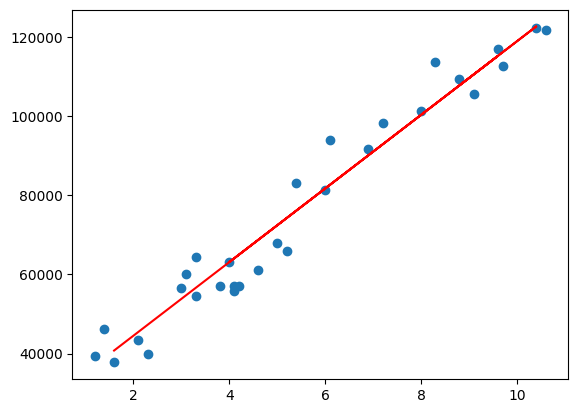

In [56]:
plt.scatter(x=df['YearsExperience'], y=df['Salary'])
plt.plot(X_test,model.predict(X_test),color='red')

In [57]:
m=model.coef_
m

array([9312.57512673])

In [58]:
b=model.intercept_
b

25849.841637955273